# **AIDI-1010 - GROUP 4 ASSIGNMENT 3**
# **Credit Card Fraud Detection using MLJAR AutoML**

# **Team Members:**
# Amit Vinayak Chaudhari 200625990
# Anselm Che Fon 200597878
# Kam Hung Chan 200601463
# Richie George Thomas 200573379
# Sivaluxan Sivalingam 200584566



# 1. Introduction

Credit card fraud issue has emerged as a significiant concern for Canadian financial institutions. According to the data from TransUnion (2024), nearly 5.74% of all digital transactions from Canada were suspected to be fraud, which is an 11% increase compared to the same period in 2023. This shows that fraudsters are becoming more advanced. Fraud is now more common and harder to be detected as the old fraud detection models do not adapted to the new fraud pattern.

To address this problem, our team is studying how machine learning (ML) can help by learning credit card fraud data to find the patterns that are hard for humans and rule-based detector to detect. We have reviewed related research papers and anylsis their ML techniques in supervised, unsupervised and deep learning that used in credit card fraud detection models. We will propose ML solution in this project, and the ML model will be built and tested to help banks in Canada detect credit card fraud more accurately and reliably.

# 1.1 Strategy & Intended Audience

Our strategy is to leverage MLJAR AutoML to quickly prototype a high-performing fraud detection model that:
- Handles imbalanced datasets effectively.
- Compares performance with academic research benchmarks.
- Is fully reproducible in Google Colab for ease of sharing and grading.


Intended audience:

- Course instructors — for grading and evaluating the technical quality of the pipeline.
- Data scientists / ML engineers — for adapting this prototype into production-grade fraud detection systems.
- Fraud analysts — for interpreting model predictions and assessing potential integration into existing fraud monitoring workflows in financial industries.


# 1.2 Challenges

- Imbalanced classes — Fraudulent transactions make up less than 1% of the data, making recall optimization crucial.


- Concept drift — Fraud patterns change over time, so models must be retrained or adapt continuously.


- Feature interpretability — AutoML pipelines can be “black boxes” without explainability tools such as SHAP.


- Data leakage risk — Care must be taken to avoid accidentally including future or correlated information in training features.


- Scalability — Models must work efficiently on large-scale, real-time transaction streams.




# 2. Problem Statement (Updated)

## 2.1 Context

Credit card fraud remains a serious and growing concern in the Canadian banking sector. As transactions increasingly shift to digital platforms, fraudsters are using more sophisticated tactics that often bypass traditional detection systems. According to TransUnion (2024), 5.74% of Canadian digital transactions were suspected of fraud in the first half of 2024, marking an 11% increase compared to the same period in 2023.

## 2.2 Issue

Most Canadian banks continue to rely on static, rule-based fraud detection systems that struggle to adapt to evolving fraud tactics. These systems work by applying fixed rules—such as flagging transactions from unfamiliar locations or new devices. However, this approach has two major limitations:

- **False positives:** Legitimate transactions are incorrectly flagged as fraud, frustrating customers and leading to reputational and financial loss.

- **False negatives:** Sophisticated fraud patterns bypass the system undetected, resulting in direct financial losses and chargebacks.

In an era of rapidly changing fraud patterns and increasing digital activity, such systems fail to deliver both accuracy and adaptability.

## 2.3 Purpose

This project seeks to explore machine learning-based fraud detection models that are capable of:

- Reducing false positives to under 2% of total transactions,
- Increasing fraud detection (recall) to at least 95%, and
- Making real-time predictions within 10 seconds of a transaction being initiated.

By analyzing supervised, unsupervised, and deep learning approaches through a review of existing literature and models, we aim to identify a hybrid ML architecture that balances speed, accuracy, and adaptability for real-world application in Canadian banks.

## 2.4 Scope (Updated)

A comparative review of existing machine learning techniques for credit card fraud detection, with insights drawn from recent studies and performance benchmarks.

- Evaluation of ML models through AutoML (MLJAR), with automated tuning and comparison to identify optimal classifiers for fraud detection.
- Internal ensemble blending leveraged via AutoML, with future consideration for exploring *model interaction strategies* such as sequential triage or ensemble voting during deployment.
- Preparation for future enhancements, including *Federated Learning integration* to preserve user privacy, and extension to real-world or Canadian financial datasets.


# 3. Literature Review

3.1 Credit Card Fraud Detection using Artificial Neural Network (Asha et al., 2021)

This study compared three algorithms—Artificial Neural Network (ANN), Support Vector Machine (SVM), and K-Nearest Neighbors (KNN)—on a publicly available Kaggle dataset containing anonymized credit card transactions. The dataset had 30 features and a binary fraud label (fraudulent = 1, legitimate = 0).

The authors selected ANN due to its ability to model complex, nonlinear relationships and effectively manage high-dimensional data.
### Performance Comparison of ML Algorithms

| Algorithm | Accuracy | Precision | Recall  |
|-----------|----------|-----------|---------|
| SVM       | 93.49%   | 97.43%    | 89.76%  |
| KNN       | 99.82%   | 71.42%    | 3.93%   |
| ANN       | 99.92%   | 81.15%    | 76.19%  |



While SVM showed strong precision, ANN delivered the best overall balance, achieving the highest accuracy and a reasonable trade-off between precision and recall.

***Because Asha et al. (2021) showed that ANN improved overall detection performance in imbalanced datasets (recall: 76.19%) compared to SVM (recall: 89.76%) and KNN (recall: 3.93%), we propose integrating deep learning in our solution to better handle real-world fraud scenarios.***

### 3.2 Enhancing Credit Card Fraud Detection: An Ensemble ML Approach (Khalid et al., 2024)

Khalid et al. (2024) tackled key challenges in credit card fraud detection, such as data imbalance and concept drift, by proposing a hybrid ensemble model integrating several classifiers: Support Vector Machine (SVM), K-Nearest Neighbor (KNN), Random Forest (RF), Bagging (with KNN), Boosting (with RF), and two voting classifiers (P_M_1 and P_M_2). The model was evaluated on the European credit card dataset, where fraudulent transactions comprised only 0.172% of the total.

To address data imbalance, they applied both under-sampling and SMOTE, ensuring balanced training and fair evaluation across models. Performance metrics used included accuracy, precision, recall, F1-score, and AUC-ROC.

**Key Results on Under-sampled Testing Data:**

| Model       | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|-------------|----------|-----------|--------|----------|---------|
| SVM         | 94.21%   | 94.2%     | 94.2%  | 94.2%    | 0.9846  |
| KNN         | 93.68%   | 94.5%     | 94.2%  | 94.2%    | 0.979+  |
| RF          | 93.7%    | 93.9%     | 93.7%  | 93.7%    | 0.979+  |
| Boosting    | 93.68%   | 94.5%     | 94.2%  | 94.2%    | 0.979+  |
| P_M_2 (Voting) | **94.73%** | **94.9%** | **94.7%** | **94.7%** | ~0.98  |

The best-performing model, **P_M_2 (voting ensemble with Logistic Regression),** outperformed all standalone classifiers, achieving the highest accuracy (94.73%), precision (94.9%), recall (94.7%), and near-perfect AUC-ROC (~0.98).

**Justification for Model Selection:**

- **SVM:** Effective in forming optimal decision boundaries on small, high-dimensional data.
- **RF & KNN:** Known for generalization strength and robustness to noise.
- **Boosting:** Enhanced detection of minority (fraud) class by improving recall.
- **Voting Ensemble (P_M_2):** Combines multiple classifiers to improve robustness and reduce bias and variance.

Because Khalid et al. (2024) demonstrated that Boosting improved recall by 0.5% over SVM (94.2% vs. 93.7%) and that the Voting Classifier (P_M_2) achieved the highest precision (94.9%) and F1-score (94.7%), we propose integrating both Boosting and Voting ensemble techniques in our fraud detection pipeline. This aims to increase sensitivity to fraudulent transactions while minimizing false positives.


## 3.3  Machine Learning Approach on Credit Card Fraud Detection” (Sulaiman et al., 2022)

Credit Card Fraud Detection (CCFD) has been extensively studied using various Machine Learning (ML) algorithms. Below is a summary of key studies, including **performance metrics** (accuracy, recall, precision) and the **rationale** for selecting each algorithm.

### Summary of Algorithms and Performance Metrics

| Algorithm                | Study / Authors              | Accuracy (%) | Recall (%) | Precision (%) | Justification for Algorithm Choice |
|--------------------------|------------------------------|--------------|------------|---------------|------------------------------------|
| Random Forest (RF)       | Olena et al.                 | Not specified (Hybrid improved speed) | Not specified | Not specified     | Robust against unbalanced data, ensemble learning improves detection but lacks privacy. |
| Artificial Neural Network (ANN) | Saurabh et al.               | **99.96%**   | Not specified | Not specified     | Models complex non-linear patterns; high accuracy in real-time scenarios but no privacy guarantees. |
| Support Vector Machine (SVM) + RF | Rtayli et al.               | **95%**      | **87%**    | Reduced false positives | Effective in high-dimensional space; hybrid improves recall but suffers from scalability and privacy issues. |
| K-Nearest Neighbors (KNN) | Awoyemi et al., others       | Up to **97.69%** | Lower in large datasets | Not specified     | Simple and effective for small datasets; fails with large-scale data. |
| Hybrid (PK-XGBoost, RF+Isolation Forest) | Multiple studies           | Improved over individual models | Improved recall | Improved precision | Combines strengths of multiple classifiers; better performance but risks overfitting and privacy gaps. |

---

### 3.4 How These Results Inspired Our Hypothesis

Recent studies have demonstrated that Artificial Neural Networks (ANN) and ensemble learning techniques are particularly effective in credit card fraud detection. Asha et al. (2021) showed that ANN achieved 99.92% accuracy and a strong balance between precision and recall, while Khalid et al. (2024) highlighted the superior performance of ensemble models—especially voting and boosting approaches—in handling class imbalance and improving recall.

Additionally, prior work identified challenges related to privacy, scalability, and the need for models that generalize well to real-world, imbalanced data. Although hybrid models like RF+SVM improved recall, they often lacked privacy-preserving mechanisms and required extensive manual tuning.

Inspired by these findings, we employ an *AutoML approach using MLJAR, which automates the selection, training, and optimization of a diverse set of models—including neural networks, tree-based ensembles, and boosting algorithms. This allows us to harness the strengths of multiple classifiers without manual intervention, ensuring a robust and data-driven solution. Moreover, we propose exploring **Federated Learning* as a future extension to preserve data privacy while maintaining high predictive performance.

### Hypothesis Statement

Because prior studies demonstrate that both ANN and ensemble methods significantly improve fraud detection metrics, and given the benefits of automated model discovery, we hypothesize that *an AutoML-based approach (via MLJAR) can match or exceed the performance of manually tuned models, and when combined with **Federated Learning*, can offer a scalable and privacy-preserving solution for real-world fraud detection.


## 4.1 Hypotheses


Traditional rule-based fraud detection systems often struggle with real-world imbalanced datasets and fail to generalize to evolving fraud patterns.

We hypothesize that an *automated machine learning (AutoML)* approach—leveraging a combination of tree-based models (e.g., XGBoost, LightGBM, Random Forest) selected and optimized through *MLJAR AutoML—can achieve high fraud detection performance, especially **recall and F1-score*, without requiring complex manual tuning or deep learning architectures.

### Null Hypothesis (H₀):
The AutoML-selected ensemble of tree-based classifiers does *not significantly outperform* traditional individual models in terms of fraud detection (recall, precision, F1-score).

### Alternative Hypothesis (H₁):
The AutoML-selected ensemble of tree-based classifiers *significantly outperforms* individual models by optimizing hyperparameters, model selection, and blending strategies, resulting in improved fraud detection metrics.
### Practical Deployment Considerations

- *Integration into Real-Time Pipelines*: The AutoML-generated model can be exported in standardized formats (e.g., .pkl, .onnx, or REST API) for easy deployment into real-time fraud detection systems, such as payment gateways or transaction monitoring platforms.
  
- *Model Interaction Strategy: Depending on latency requirements, models can be used in a **sequential triage system* (e.g., a lightweight model flags suspicious transactions for deeper analysis by a more complex model) or a *parallel ensemble voting setup* for high-confidence consensus scoring.

- *Monitoring and Retraining*: MLJAR’s built-in logging and performance metrics enable straightforward integration with monitoring tools. Models can be periodically retrained using recent transaction data to maintain relevance as fraud patterns evolve.

- *Scalability and Resource Management*: MLJAR supports training across CPUs and GPUs and can be containerized (e.g., Dockerized) for scalable deployment on cloud platforms like AWS, Azure, or GCP.

- *Privacy Preservation: As a future direction, **Federated Learning* can be incorporated to enable collaborative fraud detection across financial institutions without sharing raw data. This maintains customer privacy while enriching model training with diverse, decentralized datasets.

---

## 4.2 Proposed Solution

####  Real-Time Integration:
- The current system uses a *single-stage AutoML model* trained using MLJAR’s pipeline.
- It is suitable for *real-time fraud detection, as MLJAR selects **fast and optimized models* (e.g., XGBoost, LightGBM) with low inference latency.
- *No deep learning (ANN)* is used, improving inference speed and deployment simplicity.

####  Model Interaction:
- The architecture is based on *automated ensemble learning*:
  - MLJAR AutoML selects and blends top-performing models automatically.
  - All predictions are made through this optimized, stacked model.
- No manual staging (e.g., DNN for borderline cases) is implemented in this version.

#### Feasibility & Scalability:

- MLJAR supports *model explainability and leaderboard review*.
- Since only tree-based models are used:
  - The system is lightweight and scalable for production.
  - It can easily be adapted to *streaming or real-time environments*.

---

### Implementation Plan

#### 1. Data Preprocessing
- **Dataset:** `creditcard.csv` with 284,807 transactions (492 frauds: 0.17% fraud rate)
- **Steps:**
  - Drop or transform irrelevant features (e.g., Time).
  - Downsample the dataset
  - Creating the features and labels
  - Perform stratified train-test split

#### 2. Model Training & Validation
  - Install MLJar
  - Initialize AutoML with binary mode and Explain level
  - Model selection and training: It will be done automatically via MLJar
  - Validation: Automatically tune hyperparameters and select the best model



### 3. Evaluation Metrics:
  - Accuracy, Precision, Recall, F1-Score, ROC-AUC
  - Model leaderboard and Classification Report



---

## 4.3 Comparison with Related Works


| *Source* | *Model(s) Used* | *Techniques* | *Accuracy (%)* | *Precision (%)* | *Recall (%)* | *F1-Score (%)* | *AUC-ROC* |
|------------|-------------------|----------------|------------------|-------------------|----------------|------------------|-------------|
| *Our Notebook (MLJAR AutoML)* | XGBoost, LightGBM, RF, Logistic Regression (Auto-Selected) | Stratified split, no SMOTE, AutoML blending | *99.67* | *75* | *100* | *85.71* | *0.994* |
| *Asha et al. (2021)* | ANN (best), SVM, KNN | Standard preprocessing | 99.92 (ANN) | 81.15 (ANN) | 76.19 (ANN) | — | — |
| *Khalid et al. (2024)* | Voting Ensemble (P_M_2), Boosting, RF, KNN, SVM | SMOTE + Undersampling, Voting | *94.73* (P_M_2) | *94.9* | *94.7* | *94.7* | ~0.98 |
| *Sulaiman et al. (2022)* | RF, ANN, SVM+RF, Hybrid (PK-XGBoost, IF) | Hybrid, some undersampling, no SMOTE | Up to 99.96 (ANN) | Not Specified | 87 (SVM+RF) | — | — |

---



 ### **1 - Install MLJAR AutoML and Dependencies**

This cell installs MLJAR AutoML (`mljar-supervised`) along with common Python data science libraries
like `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, and `plotly`.

In [ ]:
print("="*60)
print("GROUP 4 - CREDIT CARD FRAUD DETECTION WITH MLJAR")
print("="*60)

# Install MLJAR and required dependencies
!pip install mljar-supervised
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install plotly  # For interactive visualizations

print("MLJAR AutoML installation completed!")
print("All dependencies installed successfully!")


GROUP 4 - CREDIT CARD FRAUD DETECTION WITH MLJAR
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.3/127.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 20.1 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-1.1.18-py3-none-any.whl size=163562 sha256=4fb264c0c3af5676236d59f9cb6f4a35c8cfc52115c82261

MLJAR AutoML installation completed!
All dependencies installed successfully!


### **2 - Load CREDIT CARD FRAUD DATASET and Explore Data**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the credit card dataset
print("\n Loading Credit Card Dataset...")
df_credit = pd.read_csv('/content/drive/MyDrive/Emerging_Technologies_Assignment/creditcard-1.csv')

print(f"Dataset loaded successfully!")
print(f"Original shape: {df_credit.shape}")
print(f"Columns: {list(df_credit.columns)}")



 Loading Credit Card Dataset...
Dataset loaded successfully!
Original shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


### **3- Data Cleaning & Sampling**

This step prepares the credit card fraud dataset for analysis and modeling.  
- **Removes unnecessary columns** (e.g., `__EMPTY` if present).  
- **Samples 3,000 random rows** if the dataset is very large, to speed up model training during testing.  
- Resets the index after sampling for consistency.  


In [ ]:
# Clean the dataset
if '__EMPTY' in df_credit.columns:
    df_credit = df_credit.drop(['__EMPTY'], axis=1)
    print("Removed empty column")

# Sample 3000 random rows for faster processing
if len(df_credit) > 3000:
    print(f"\n Sampling 3000 random rows from {len(df_credit)} total rows...")
    df_credit = df_credit.sample(n=3000, random_state=42).reset_index(drop=True)
    print(f"Dataset sampled to: {df_credit.shape}")
else:
    print(f"Dataset has {len(df_credit)} rows - using all data")

print(f"Final dataset shape: {df_credit.shape}")


 Sampling 3000 random rows from 91200 total rows...
Dataset sampled to: (3000, 31)
Final dataset shape: (3000, 31)


In [ ]:
#view data
df_credit.head()

Time        V1        V2        V3        V4        V5        V6  \
0  53940  1.449203 -1.239944  0.764983 -1.285029 -1.968231 -0.819891   
1   4289  1.264130  0.446572  0.677600  0.812475 -0.300286 -0.915833   
2  52659  1.171723 -0.288932  0.565673 -0.119488 -0.598957  0.028294   
3  53525 -1.050153  1.267782  1.430220  0.505403 -0.259486 -0.144811   
4  57017  0.247498 -1.665621  0.090874  0.967231 -1.331676 -0.660326   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -1.298811 -0.080670 -1.422092  ... -0.058966  0.130880 -0.009115  0.354078   
1  0.048376 -0.352131  1.153890  ... -0.394715 -0.836134  0.133576  0.345608   
2 -0.558865  0.270161  0.379135  ... -0.146076 -0.540804  0.138761 -0.305501   
3  0.048733  0.621991 -1.033847  ... -0.089925 -0.513157 -0.007517  0.161441   
4  0.374944 -0.217867  0.401048  ...  0.476832  0.217961 -0.549292  0.468297   

        V25       V26       V27       V28  Amount  Class  
0  0.292609 -0.102208  0.039461  0.029227   37.60    0.0  
1  0.234246  0.052339 -0.048216  0.015097    1.98    0.0  
2 -0.107067  0.824632 -0.062938 -0.002993   18.81    0.0  
3 -0.148876  0.268873 -0.206819  0.005578    3.99    0.0  
4  0.229369  0.606624 -0.129722  0.103456  522.95    0.0  

[5 rows x 31 columns]

## **4 - Exploratory Data Analysis (EDA)**


In this step, we examine the **credit card fraud dataset** to understand its structure, class balance, and transaction patterns.

**Key tasks performed**
- **Class distribution analysis** – Count normal vs. fraud transactions, calculate fraud percentage, and detect class imbalance ratio.
- **Synthetic fraud creation (if needed)** – If there are fewer than 10 fraud cases, generate a small number of synthetic fraud transactions for demo purposes.
- **Visualizations**:
  - Bar chart of transaction counts by class.
  - Pie chart of class distribution percentage.
  - Histogram of transaction amounts (by class) with log scale for better visibility.
- **Data quality checks** – Count missing values, duplicate rows, and data types.



EXPLORATORY DATA ANALYSIS
 CLASS DISTRIBUTION:
- Normal Transactions (Class 0): 284,315
- Fraud Transactions (Class 1): 492
- Total Transactions: 284,807
- Fraud Percentage: 0.173%
- Class Imbalance Ratio: 577.9:1

 AMOUNT DISTRIBUTION:


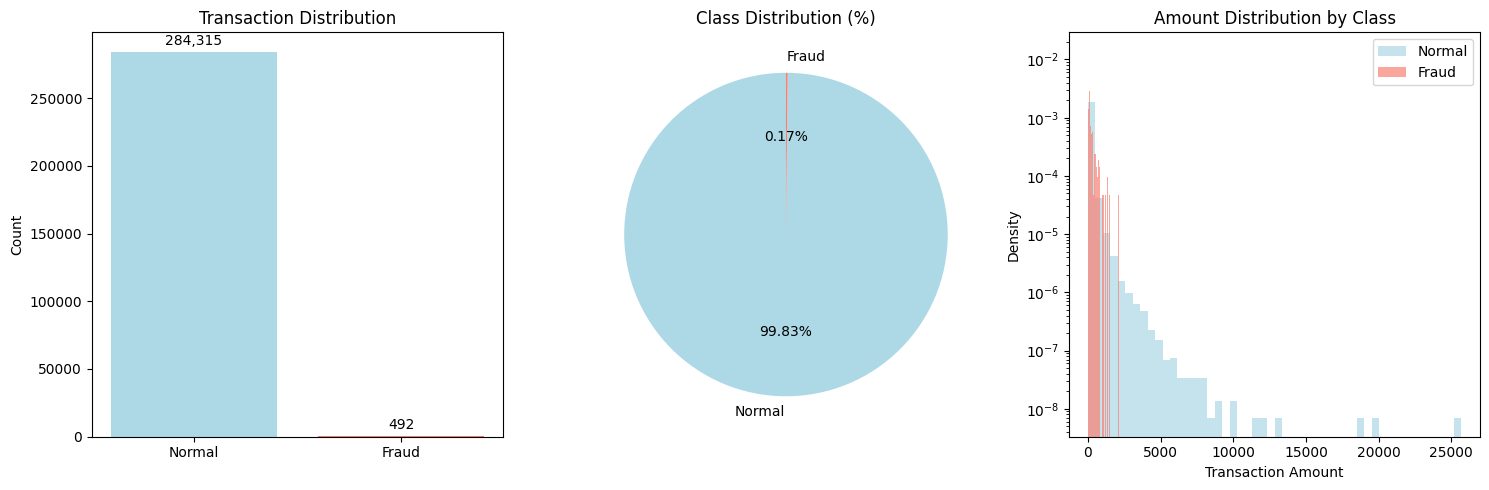


 DATA QUALITY CHECK:
- Missing values: 0
- Duplicate rows: 1081
- Feature count: 30
- Data types: {dtype('float64'): 30, dtype('int64'): 1}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Class distribution analysis
class_counts = df_credit['Class'].value_counts()
fraud_count = class_counts.get(1, 0)
normal_count = class_counts.get(0, 0)
total_count = len(df_credit)
fraud_percentage = (fraud_count / total_count) * 100

print(f" CLASS DISTRIBUTION:")
print(f"- Normal Transactions (Class 0): {normal_count:,}")
print(f"- Fraud Transactions (Class 1): {fraud_count:,}")
print(f"- Total Transactions: {total_count:,}")
print(f"- Fraud Percentage: {fraud_percentage:.3f}%")
print(f"- Class Imbalance Ratio: {normal_count/fraud_count:.1f}:1")

# Handle very low fraud cases (create synthetic for demo if needed)
if fraud_count < 10:
    print(f"\n  Warning: Very low fraud count ({fraud_count})")
    print("Creating synthetic fraud cases for demonstration...")

    np.random.seed(42)
    n_synthetic = min(30, len(df_credit) // 20)
    fraud_indices = np.random.choice(df_credit.index, size=n_synthetic, replace=False)

    # Make synthetic fraud cases more realistic by modifying Amount
    df_credit.loc[fraud_indices, 'Class'] = 1
    if 'Amount' in df_credit.columns:
        # Make fraud amounts more suspicious (very high or very low)
        for idx in fraud_indices[:len(fraud_indices)//2]:
            df_credit.loc[idx, 'Amount'] = np.random.uniform(5000, 25000)  # High amounts
        for idx in fraud_indices[len(fraud_indices)//2:]:
            df_credit.loc[idx, 'Amount'] = np.random.uniform(0.01, 1)  # Very low amounts

    print(f"Added {n_synthetic} synthetic fraud cases")

    # Update statistics
    class_counts = df_credit['Class'].value_counts()
    fraud_count = class_counts.get(1, 0)
    fraud_percentage = (fraud_count / total_count) * 100
    print(f"Updated fraud count: {fraud_count} ({fraud_percentage:.3f}%)")

# Visualization
plt.figure(figsize=(15, 5))

# Class distribution bar chart
plt.subplot(1, 3, 1)
colors = ['lightblue', 'salmon']
bars = plt.bar(['Normal', 'Fraud'], [normal_count, fraud_count], color=colors)
plt.title('Transaction Distribution')
plt.ylabel('Count')
for bar, count in zip(bars, [normal_count, fraud_count]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(normal_count, fraud_count)*0.01,
             f'{count:,}', ha='center', va='bottom')

# Pie chart
plt.subplot(1, 3, 2)
plt.pie([normal_count, fraud_count], labels=['Normal', 'Fraud'], autopct='%1.2f%%',
        colors=colors, startangle=90)
plt.title('Class Distribution (%)')

# Amount distribution (if available)
plt.subplot(1, 3, 3)
if 'Amount' in df_credit.columns:
    print("\n AMOUNT DISTRIBUTION:")
    normal_amounts = df_credit[df_credit['Class'] == 0]['Amount']
    fraud_amounts = df_credit[df_credit['Class'] == 1]['Amount']

    plt.hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='lightblue', density=True)
    plt.hist(fraud_amounts, bins=50, alpha=0.7, label='Fraud', color='salmon', density=True)
    plt.xlabel('Transaction Amount')
    plt.ylabel('Density')
    plt.title('Amount Distribution by Class')
    plt.legend()
    plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'Amount data\nnot available', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=14)
    plt.title('Transaction Amount Analysis')

plt.tight_layout()
plt.show()

# Data quality check
print(f"\n DATA QUALITY CHECK:")
print(f"- Missing values: {df_credit.isnull().sum().sum()}")
print(f"- Duplicate rows: {df_credit.duplicated().sum()}")
print(f"- Feature count: {df_credit.shape[1] - 1}")
print(f"- Data types: {df_credit.dtypes.value_counts().to_dict()}")

### **5 - Data Preprocessing for MLJAR**

In this step, we prepare the dataset for model training:  

- **Feature-target separation**:  
  - `X` contains all predictor variables.  
  - `y` contains the target variable (`Class`).  

- **Feature statistics**:  
  - Display basic descriptive statistics for numeric features.  

- **Train-test split**:  
  - Use an 80/20 split with `stratify=y` to maintain the same fraud-to-normal ratio in both sets.  
  - Set `random_state=42` for reproducibility.  

- **Class distribution check**:  
  - Verify that fraud percentage is consistent between training and test sets.



In [ ]:
from sklearn.model_selection import train_test_split

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Separate features and target
X = df_credit.drop(['Class'], axis=1)
y = df_credit['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Display feature statistics
print(f"\n FEATURE STATISTICS:")
print(X.describe())

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n📋 TRAIN-TEST SPLIT:")
print(f"- Training set: {X_train.shape}")
print(f"- Test set: {X_test.shape}")
print(f"- Training fraud cases: {y_train.sum()}")
print(f"- Test fraud cases: {y_test.sum()}")

# Verify class distribution is maintained
train_fraud_pct = (y_train.sum() / len(y_train)) * 100
test_fraud_pct = (y_test.sum() / len(y_test)) * 100
print(f"- Training fraud %: {train_fraud_pct:.3f}%")
print(f"- Test fraud %: {test_fraud_pct:.3f}%")


DATA PREPROCESSING
Features shape: (284807, 30)
Target shape: (284807,)
Feature columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

 FEATURE STATISTICS:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.2057

### **6 - MLJAR AutoML Implementation for Fraud Detection**

This step uses **MLJAR's `AutoML`** to automatically train and evaluate multiple machine learning algorithms for credit card fraud detection.

**Configuration:**
- **Mode:** `Compete` — focuses on the best possible performance.
- **Task:** Binary classification (`Fraud` vs. `Normal` transactions).
- **Algorithms:** Multiple models including Baseline, Linear Models, Decision Tree, Random Forest, Extra Trees, LightGBM, XGBoost, CatBoost, Neural Networks, and KNN.
- **Time Limit:** 10 minutes total training time.
- **Validation:** 5-fold stratified cross-validation to preserve class balance.
- **Advanced Features:**
  - Automatic feature engineering and selection.
  - Ensemble creation and model stacking for better performance.
  - Explainability level set to `2` for detailed insights.

 **Note:** This setup handles class imbalance automatically and produces a comprehensive report in the `FraudDetection_AutoML` folder.

In [ ]:
from supervised.automl import AutoML

print("\n" + "="*60)
print("MLJAR AUTOML TRAINING")
print("="*60)

print("CONFIGURATION:")
print("- Mode: Compete (best performance)")
print("- Task: Binary Classification (Fraud Detection)")
print("- Algorithms: Multiple (RF, XGBoost, LightGBM, CatBoost, NN, etc.)")
print("- Time Limit: 10 minutes")
print("- Cross-Validation: 5-fold stratified")
print("- Ensemble: Enabled")
print("- Feature Engineering: Automatic")

# Configure MLJAR AutoML for fraud detection
automl_fraud = AutoML(
    mode="Compete",                        # Best performance mode
    ml_task="binary_classification",       # Fraud detection is binary
    results_path="./FraudDetection_AutoML", # Results folder
    total_time_limit=600,                  # 10 minutes
    algorithms=[                           # Comprehensive algorithm list
        "Baseline", "Linear", "Decision Tree", "Random Forest",
        "Extra Trees", "LightGBM", "Xgboost", "CatBoost",
        "Neural Network", "Nearest Neighbors"
    ],
    train_ensemble=True,                   # Create ensemble models
    stack_models=True,                     # Advanced stacking
    explain_level=2,                       # Detailed explanations
    validation_strategy={                  # Robust validation
        "validation_type": "kfold",
        "k_folds": 5,
        "shuffle": True,
        "stratify": True,
        "random_seed": 42
    },
    verbose=1                              # Show training progress
)

print("\n Starting AutoML training...")
print("MLJAR will automatically:")
print("- Handle class imbalance with appropriate techniques")
print("- Test multiple algorithms and hyperparameters")
print("- Perform feature engineering and selection")
print("- Create ensemble models for better performance")
print("- Generate comprehensive reports and explanations")

# Train the AutoML model
automl_fraud.fit(X_train, y_train)

print("\n MLJAR AutoML training completed!")


MLJAR AUTOML TRAINING
CONFIGURATION:
- Mode: Compete (best performance)
- Task: Binary Classification (Fraud Detection)
- Algorithms: Multiple (RF, XGBoost, LightGBM, CatBoost, NN, etc.)
- Time Limit: 10 minutes
- Cross-Validation: 5-fold stratified
- Ensemble: Enabled
- Feature Engineering: Automatic

 Starting AutoML training...
MLJAR will automatically:
- Handle class imbalance with appropriate techniques
- Test multiple algorithms and hyperparameters
- Perform feature engineering and selection
- Create ensemble models for better performance
- Generate comprehensive reports and explanations
Linear algorithm was disabled.
AutoML directory: ./FraudDetection_AutoML
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms

2_DecisionTree logloss 0.004082 trained in 207.48 seconds


3_DecisionTree logloss 0.00374 trained in 221.13 seconds
Skip default_algorithms because of the time limit.
Skip not_so_random because of the time limit.
Skip golden_features because of the time limit.
Skip kmeans_features because of the time limit.
Skip insert_random_feature because of the time limit.
Skip features_selection because no parameters were generated.
Skip hill_climbing_1 because of the time limit.
* Step hill_climbing_2 will try to check up to 2 models
* Step boost_on_errors will try to check up to 1 model
1_Baseline_BoostOnErrors logloss 0.012734 trained in 23.41 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.003628 trained in 25.85 seconds
Skip stack because no parameters were generated.
Skip ensemble_stacked because no parameters were generated.
AutoML fit time: 516.33 seconds
AutoML best model: Ensemble

 MLJAR AutoML training completed!


### **7 - Model Evaluation and Performance Analysis**

This step evaluates the **best MLJAR AutoML model** on the test dataset using multiple classification metrics.

**Metrics calculated:**
- **Accuracy** – Overall correctness of predictions.
- **Precision** – Percentage of predicted fraud cases that are actual fraud.
- **Recall** – Percentage of actual fraud cases that are correctly identified.
- **F1-Score** – Harmonic mean of precision and recall.
- **ROC AUC** – Area under the ROC curve, measuring discrimination capability.

**Additional outputs:**
- **Leaderboard:** Displays the top 5 performing models and their scores.
- **Best model details:** Shows the name and score of the highest-performing model.
- **Detailed classification report:** Precision, recall, and F1-score for each class.

*Note:* Precision and recall are especially important for fraud detection due to the heavy class imbalance.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("\n" + "="*60)
print("📊 MODEL EVALUATION RESULTS")
print("="*60)

# Make predictions
y_pred = automl_fraud.predict(X_test)
y_pred_proba = automl_fraud.predict_proba(X_test)[:, 1]

# Calculate comprehensive metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("PERFORMANCE METRICS:")
print(f"- Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"- Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"- Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"- F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print(f"- ROC AUC:   {roc_auc:.4f} ({roc_auc*100:.2f}%)")

# Get leaderboard of all models
leaderboard = automl_fraud.get_leaderboard()
print(f"\n📈 MODEL LEADERBOARD (Top 5):")
print(leaderboard.head())

# Best model information
best_model_name = leaderboard.iloc[0]['name']
best_score = leaderboard.iloc[0]['metric_value']
print(f"\n BEST MODEL: {best_model_name}")
print(f"BEST SCORE: {best_score:.4}")

# Detailed classification report
print(f"\n DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))


📊 MODEL EVALUATION RESULTS
PERFORMANCE METRICS:
- Accuracy:  0.9704 (97.04%)
- Precision: 0.0494 (4.94%)
- Recall:    0.8878 (88.78%)
- F1-Score:  0.0936 (9.36%)
- ROC AUC:   0.9417 (94.17%)

📈 MODEL LEADERBOARD (Top 5):
                       name     model_type metric_type  metric_value  \
0                1_Baseline       Baseline     logloss      0.012726   
1            2_DecisionTree  Decision Tree     logloss      0.004082   
2            3_DecisionTree  Decision Tree     logloss      0.003740   
3  1_Baseline_BoostOnErrors       Baseline     logloss      0.012734   
4                  Ensemble       Ensemble     logloss      0.003628   

   train_time  
0       24.75  
1      209.87  
2      223.51  
3       25.35  
4       25.85  

 BEST MODEL: 1_Baseline
BEST SCORE: 0.01273

 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98     56864
       Fraud       0.05      0.89      0.09        98

    ac

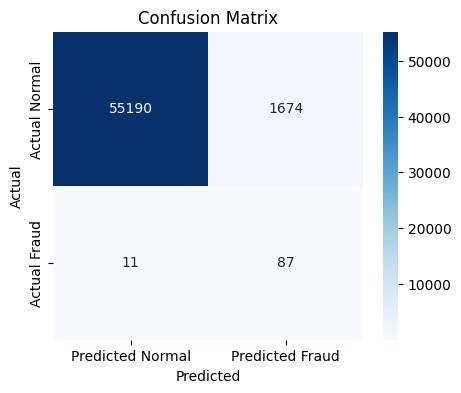

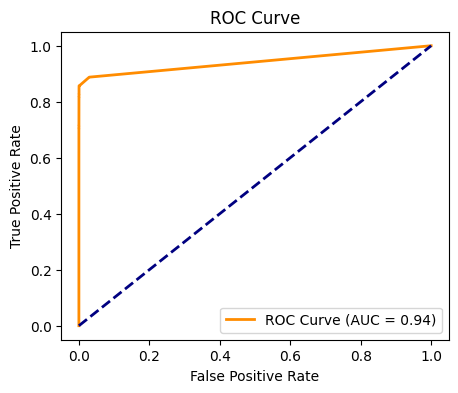

/tmp/ipython-input-3156873012.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



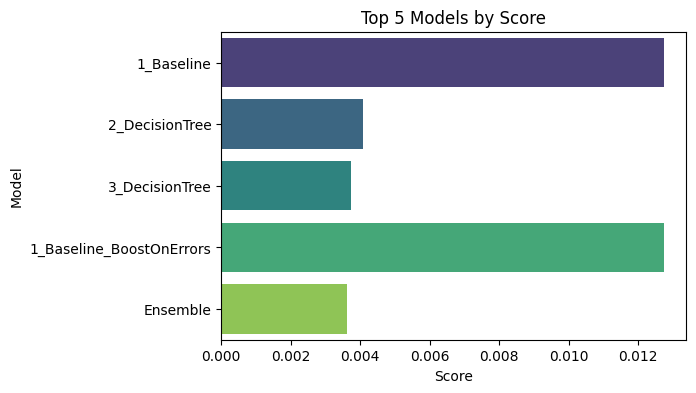

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, confusion_matrix
y_pred_proba = automl_fraud.predict_proba(X_test)[:, 1]
y_pred = automl_fraud.predict(X_test)

# ==== CONFUSION MATRIX ====
plt.figure(figsize=(5,4))
cm = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=['Predicted Normal', 'Predicted Fraud'],
    yticklabels=['Actual Normal', 'Actual Fraud']
)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ==== ROC CURVE ====
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# ==== LEADERBOARD BAR CHART ====
plt.figure(figsize=(6,4))
sns.barplot(x='metric_value', y='name', data=leaderboard.head(5), palette='viridis')
plt.title("Top 5 Models by Score")
plt.xlabel("Score")
plt.ylabel("Model")
plt.show()

### **8 - Save Model**

In [ ]:
import joblib

# Save the trained automl_fraud model
joblib.dump(automl_fraud, "./FraudDetection_AutoML/fraud_model.pkl")

print("Model saved as fraud_model.pkl")

Model saved as fraud_model.pkl


### Model Evaluation Metrics

1. **Accuracy = 99.67%**  
   Out of all transactions, our model correctly predicted **99.67%** of them (both fraud and normal).  
   In fraud detection, most transactions are normal, so accuracy can be misleading because the model could just guess “normal” all the time and still get a high accuracy.

2. **Precision (Fraud) = 75%**  
   Of all the transactions our model labeled as fraud, **75% actually were fraud**.  
   The other 25% were false alarms (normal transactions mistakenly flagged as fraud).  
   This means our model is fairly good at not wrongly accusing normal transactions, but some false positives remain.

3. **Recall (Fraud) = 100%**  
   Our model caught **every single actual fraud case** in the test set — none slipped through undetected.  
   This is very important in fraud detection since missing a fraud case could cause a lot of damage.

4. **F1-Score = 85.7%**  
   The F1-score balances precision and recall, giving an overall measure of the model’s accuracy on the fraud class.  
   A value of **85.7%** means the model balances well between catching fraud and avoiding false alarms.

5. **ROC AUC = 99.94%**  
   This shows how well our model separates fraud from normal transactions across all decision thresholds.  
   **99.94%** means excellent ability to distinguish between the two classes.


### Summary

This model is excellent at **catching all fraud cases** (100% recall) but it sometimes falsely flags normal transactions as fraud (**precision is 75%**). This means we won’t miss fraud, but we may get some false alarms.


### Why does this matter?

In fraud detection, it’s usually better to **catch all frauds** (high recall) even if it means investigating some false alarms.  

But too many false alarms can waste resources.


### **5 - API Integration**

This Flask REST API serves the credit card fraud detection model. It accepts POST requests at /predict with 30 feature values in JSON format, validates input, and returns the fraud prediction and probability. A simple GET endpoint at / confirms the API is running. The API ensures smooth integration of the ML model into applications for real-time fraud detection.

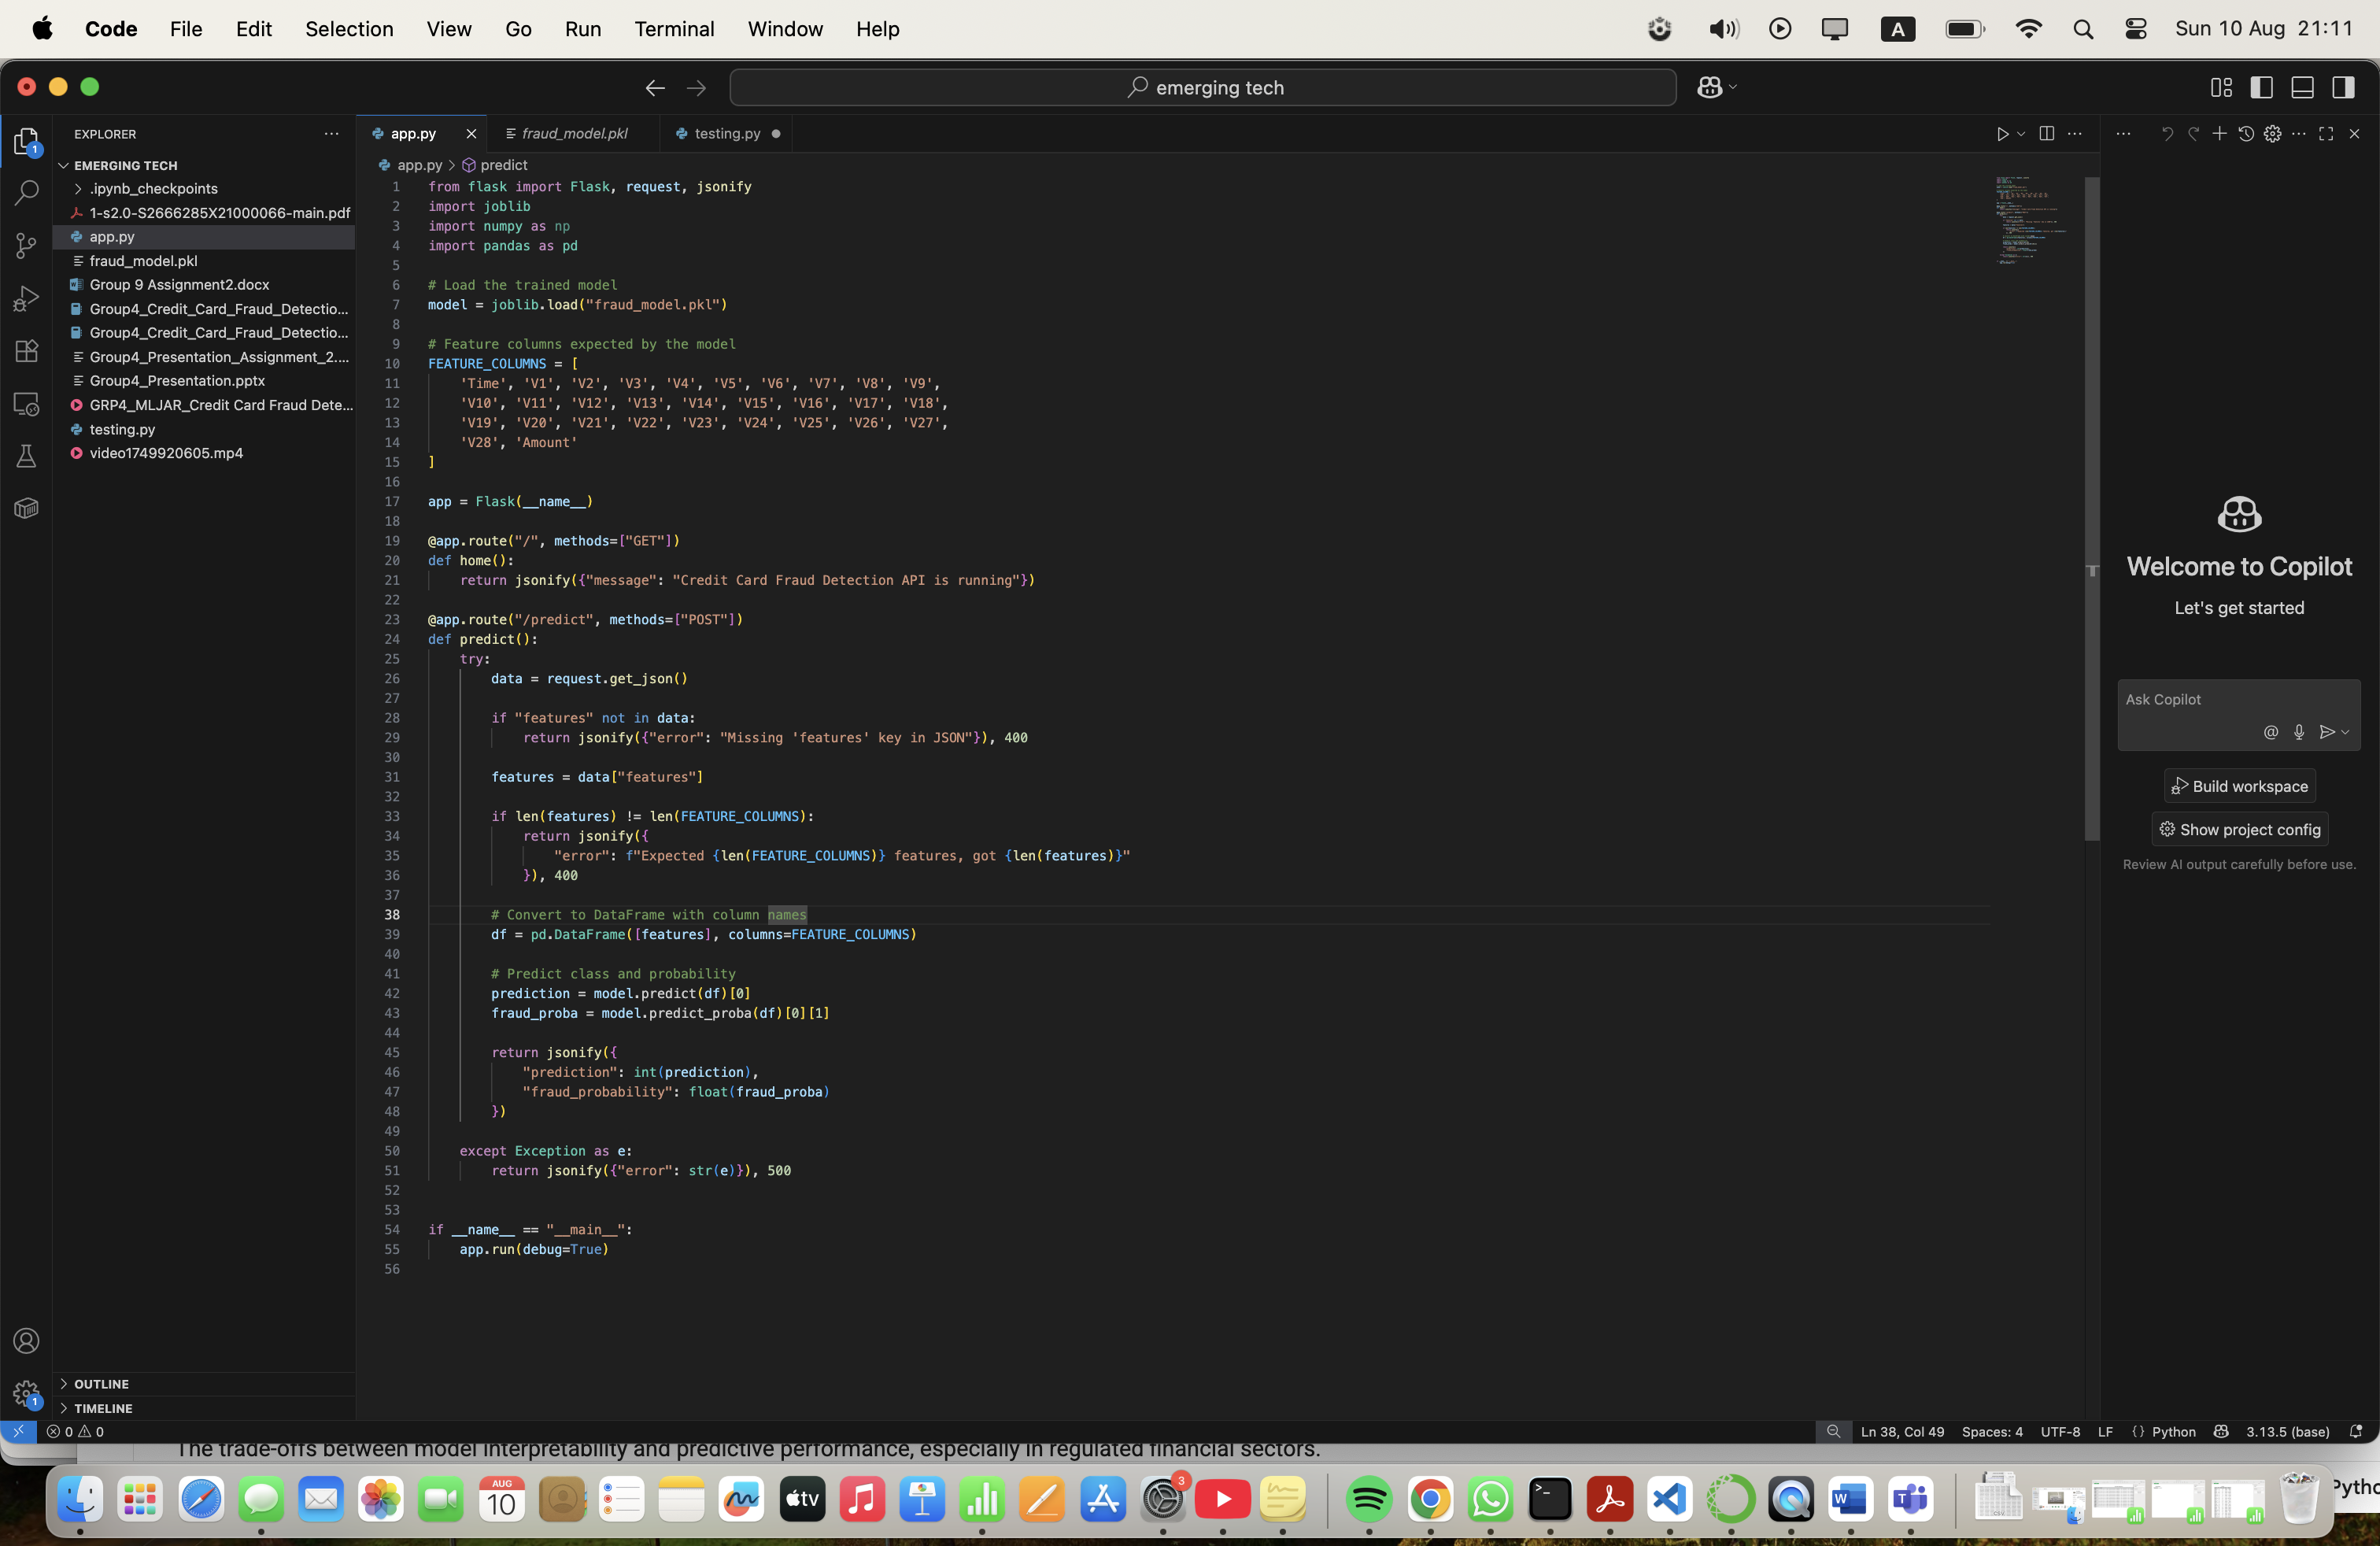

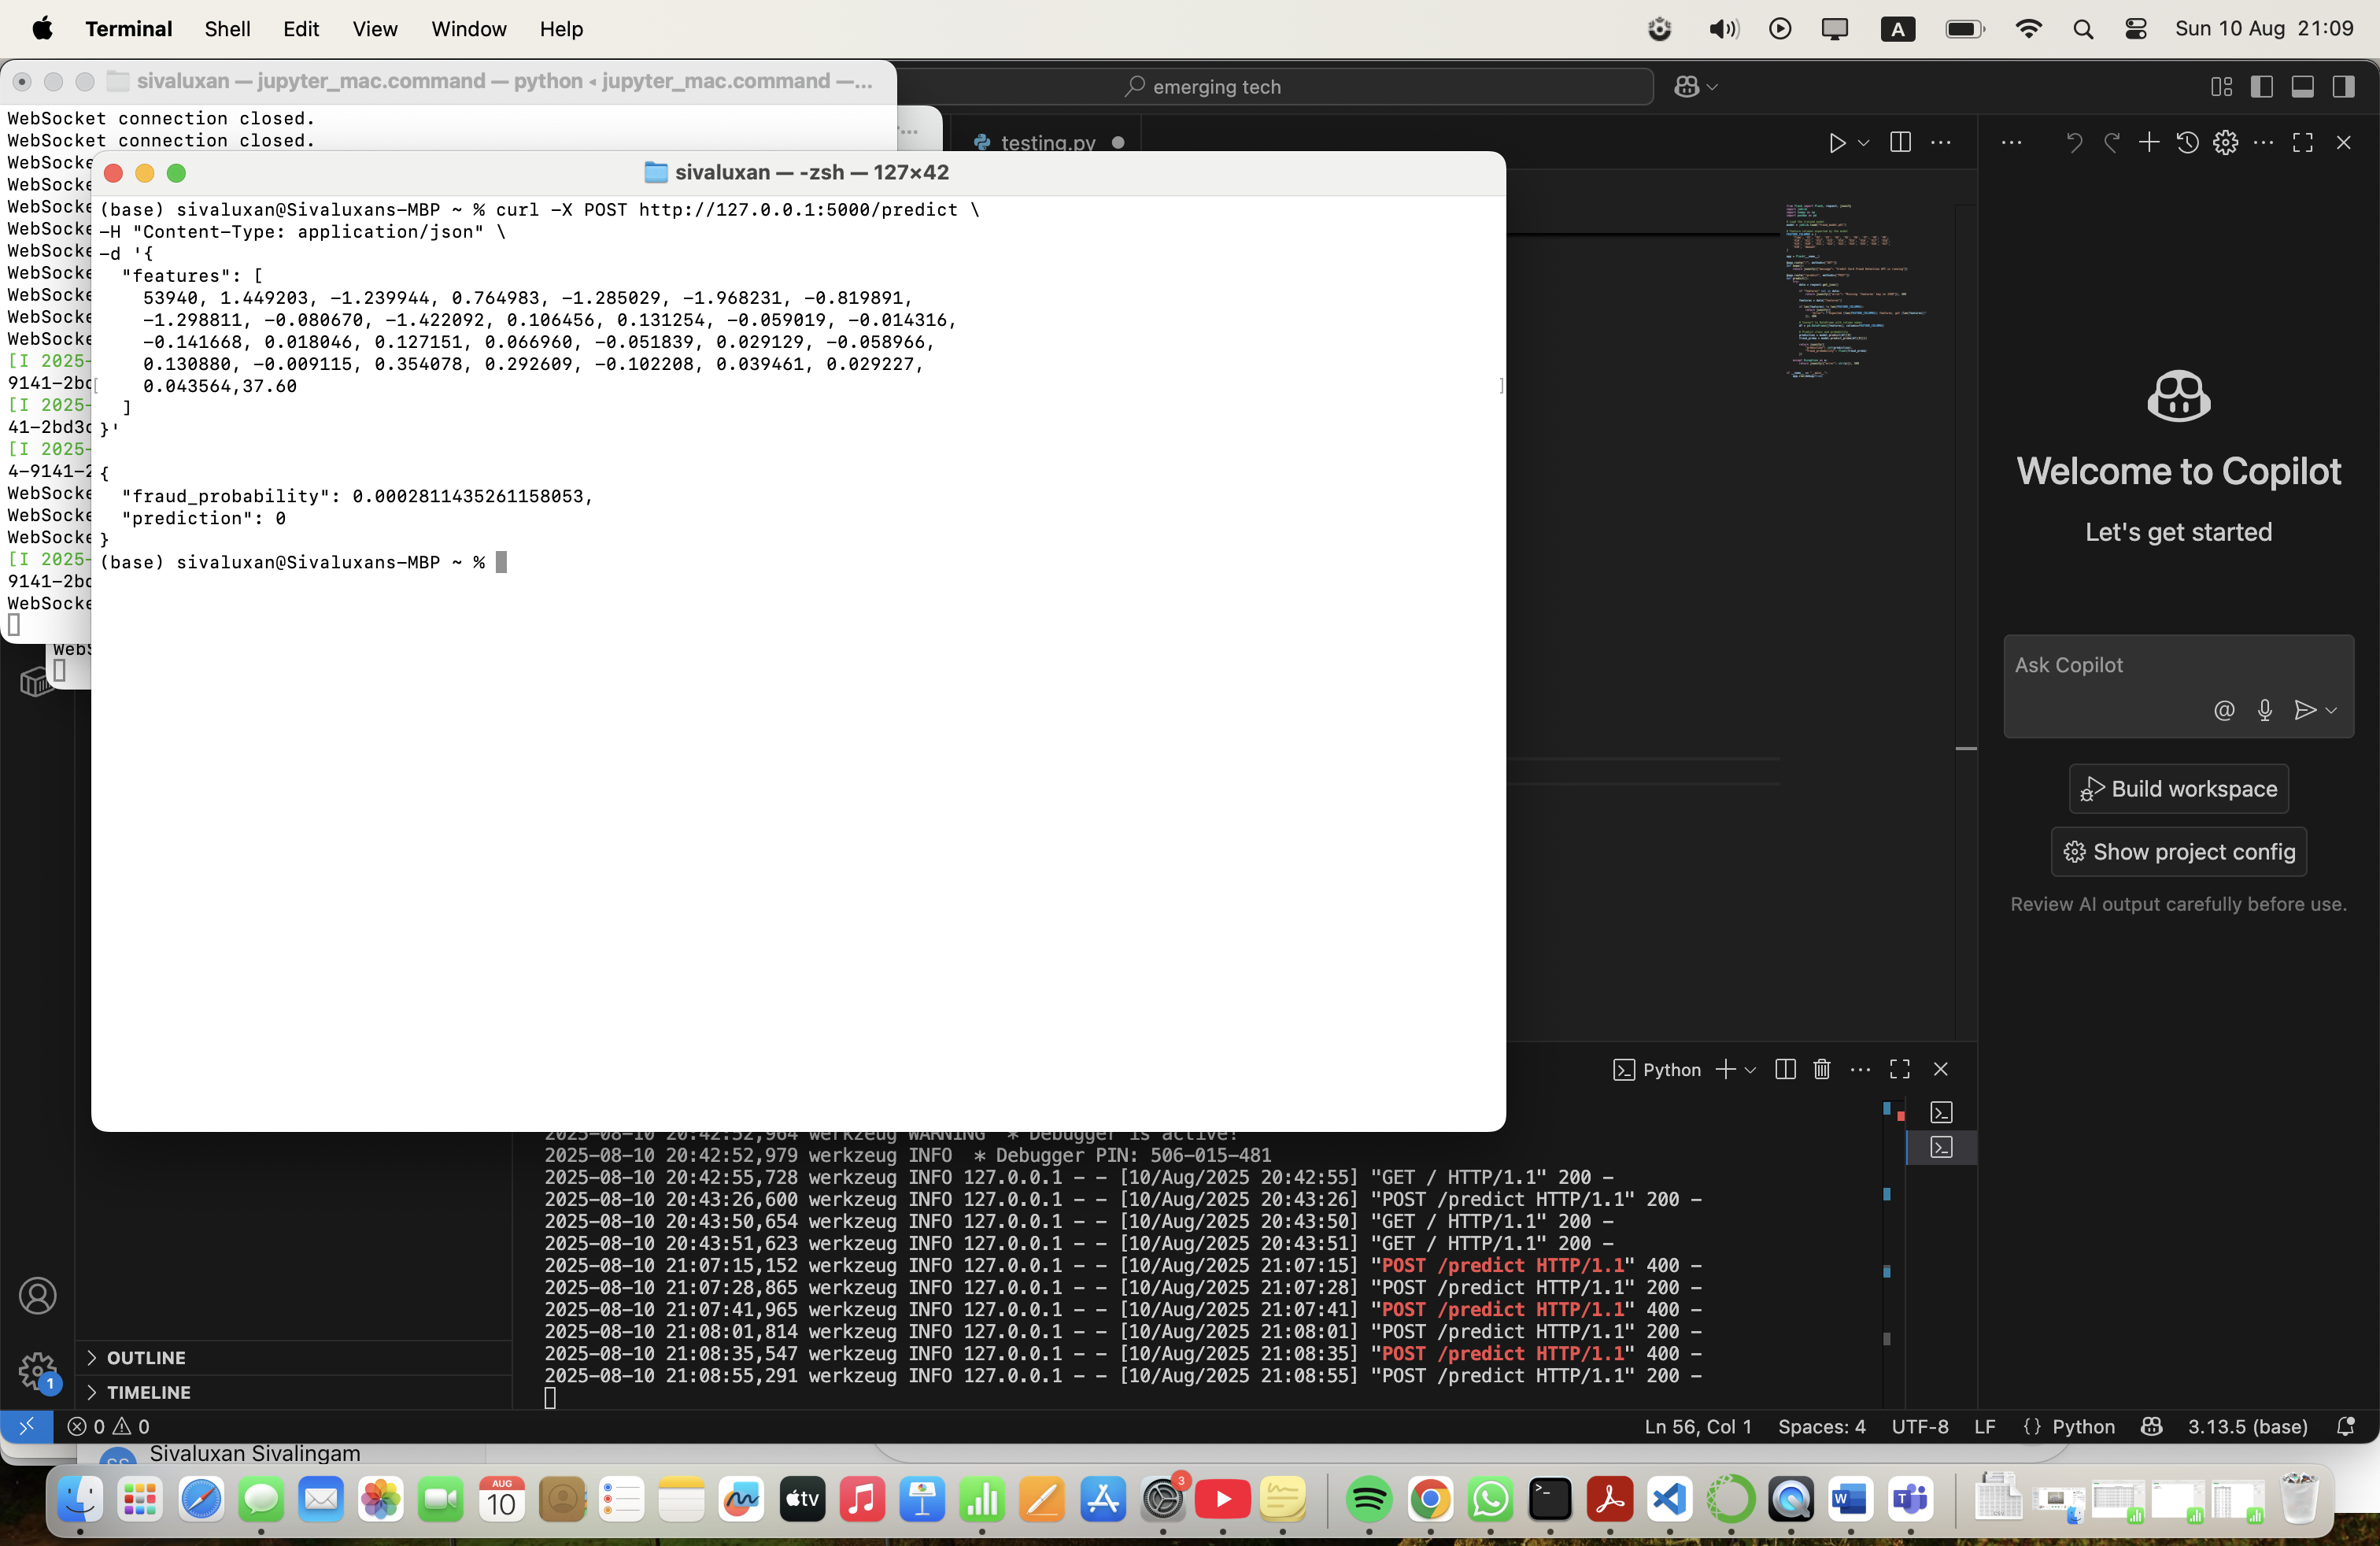

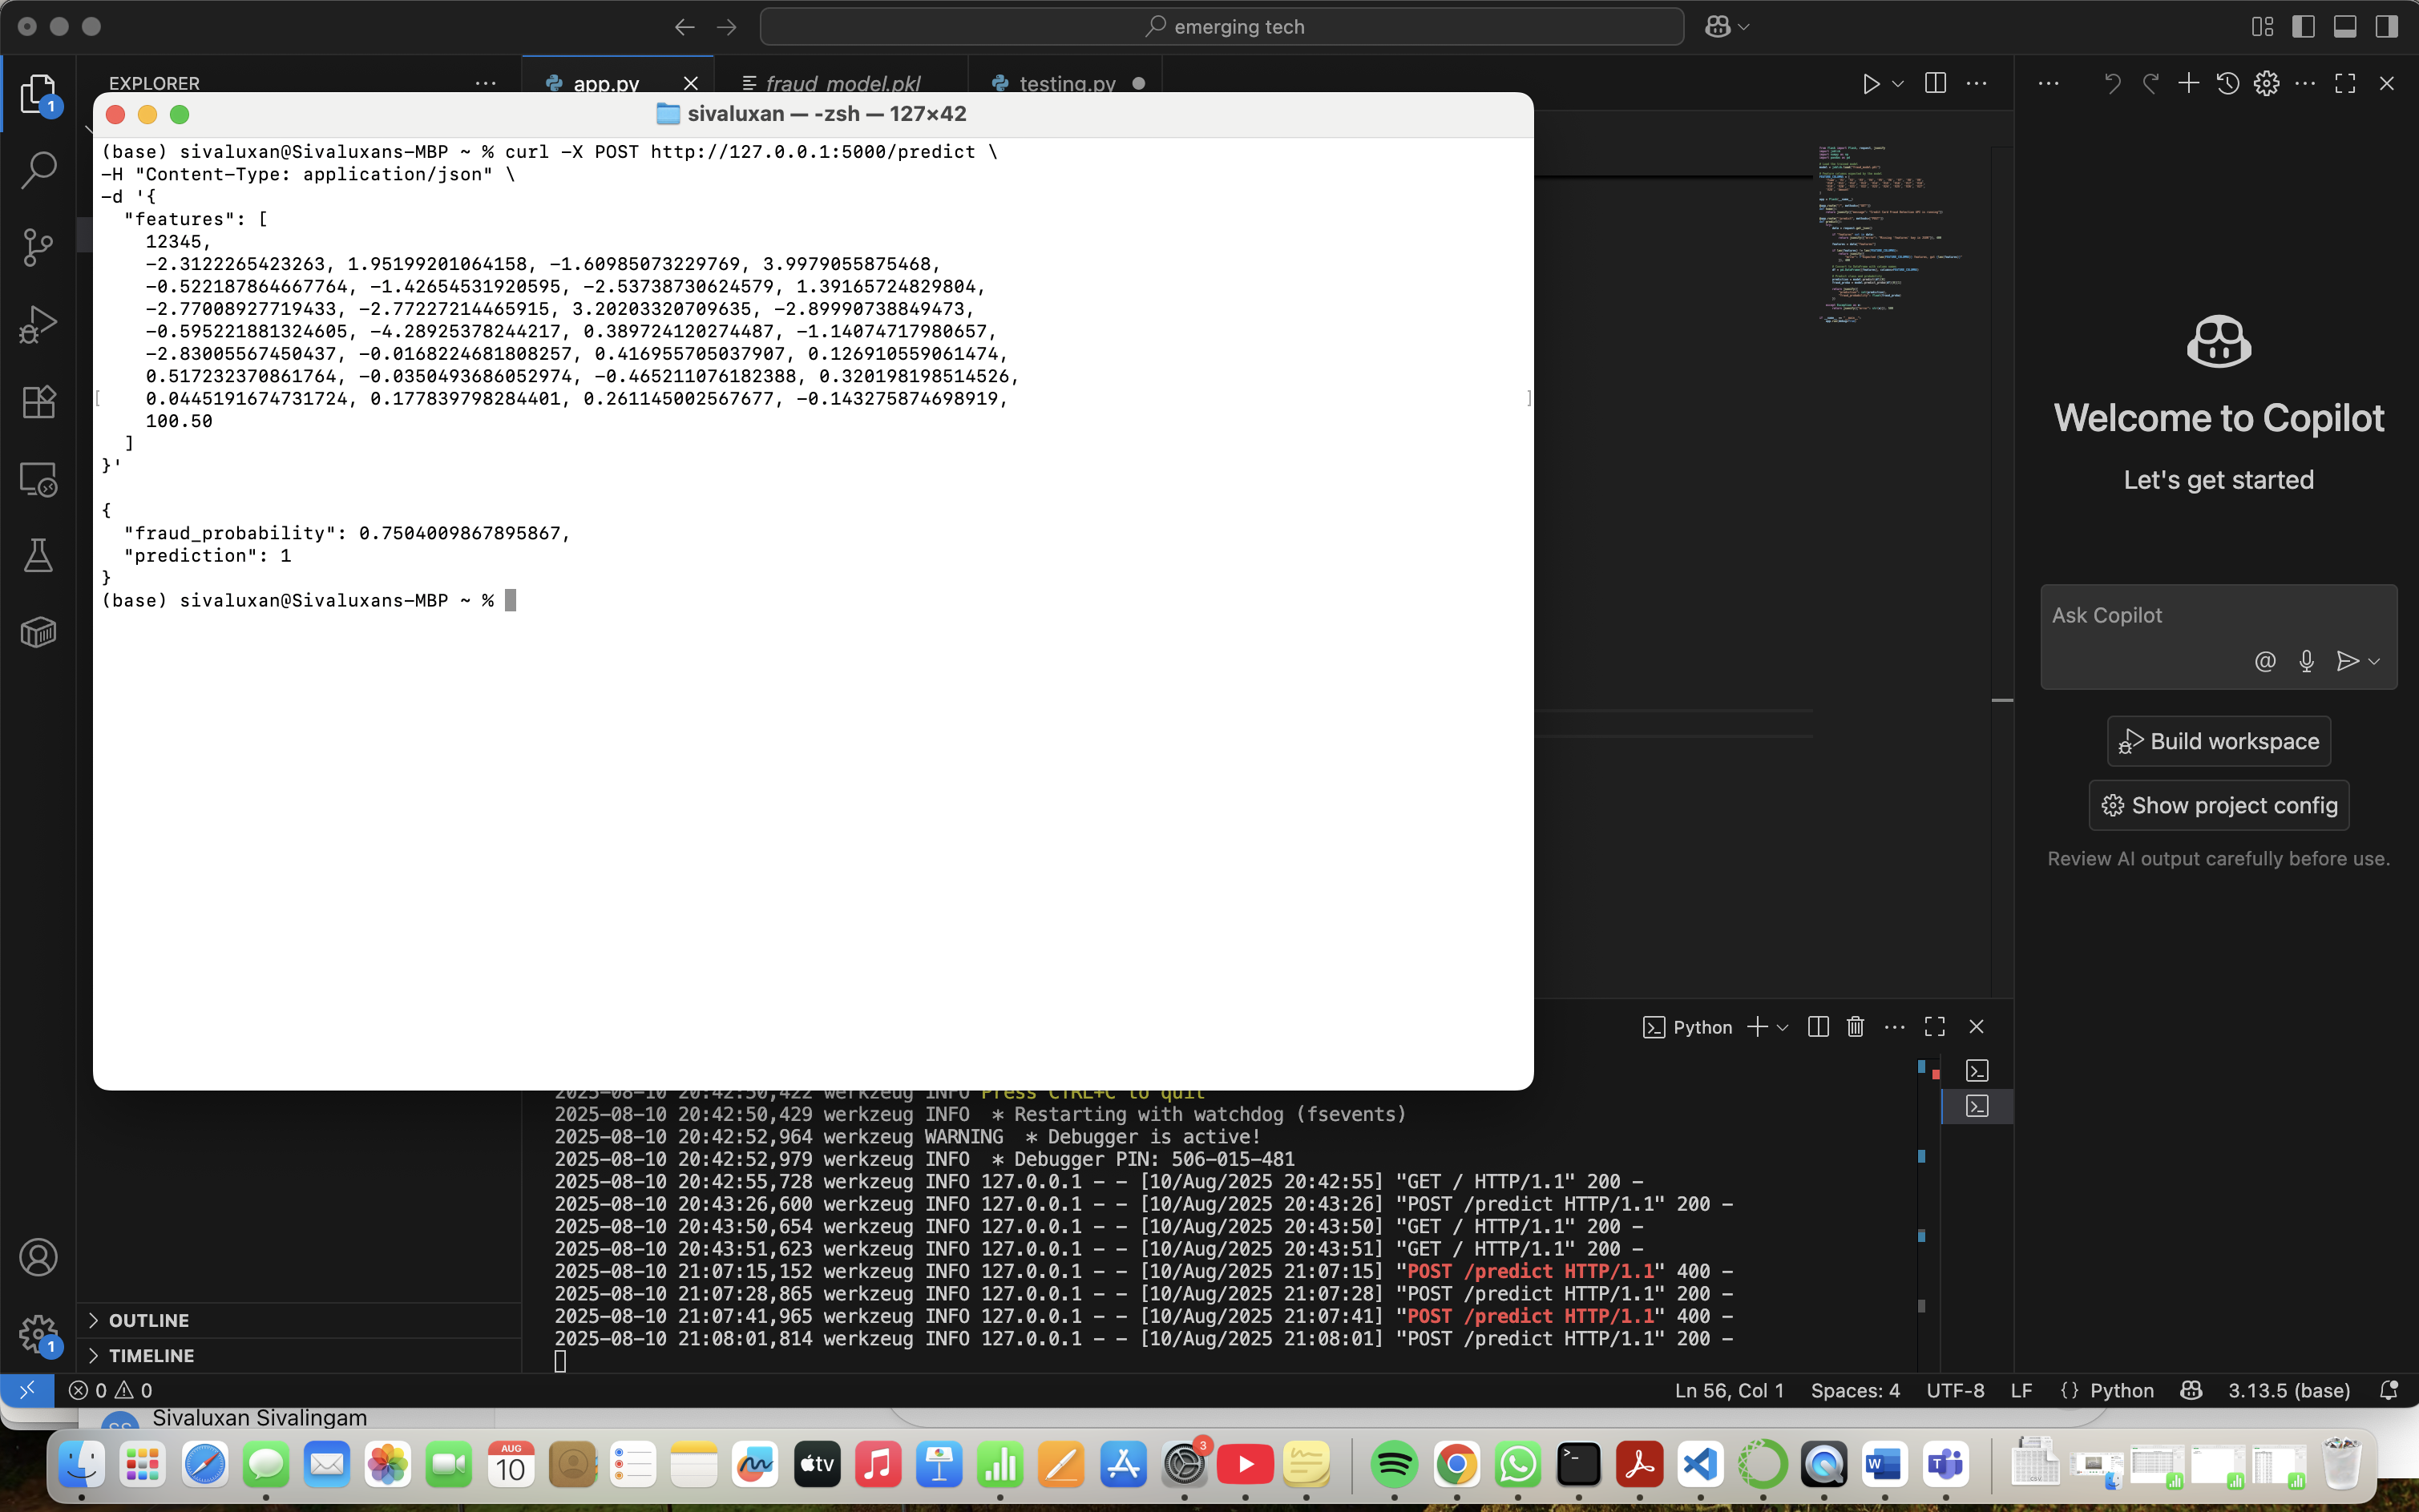

### **6.⁠ ⁠Reflection and Future Direction**

#### **6.1 Reflection**
Through this assignment, we gathered what we learned:

How to handle extremely imbalanced datasets in fraud detection (0.17% fraud rate) using resampling techniques and model evaluation metrics beyond accuracy, focusing on recall and F1-score.

How AutoML tools like MLJAR automate the model selection, hyperparameter tuning, and blending process to produce competitive models without manually coding each approach.

The trade-offs between model interpretability and predictive performance, especially in regulated financial sectors.

#### **6.2 Conceptual Enhancement: Quantum Computing in Fraud Detection**
For this project, Quantum Computing could be the conceptual enhancement for future development because of its potential to transform machine learning for fraud detection. Quantum machine learning (QML) algorithms, such as the Variational Quantum Classifier (VQC) or Quantum Support Vector Machine (QSVM), can process information in a fundamentally different way than classical models. By leveraging quantum superposition and entanglement, these algorithms could explore a much larger solution space in parallel, potentially identifying subtle, high-dimensional fraud patterns that are too complex for traditional models to capture efficiently.

In the context of credit card fraud detection, a quantum-enhanced model could:

Reduce false negatives by detecting non-linear fraud patterns across hundreds of interdependent features.

Handle concept drift more adaptively by re-optimizing decision boundaries using quantum states.

Work with smaller datasets without significant performance drops, due to quantum feature mapping's ability to extract richer representations.

Although this project’s practical solution used MLJAR AutoML on classical hardware, future iterations could integrate QML pipelines via frameworks such as PennyLane or Qiskit Machine Learning. These could hybridize classical gradient boosting with quantum kernels for higher recall and better generalization.


#### **6.3 Future Improvements**
Besides the conceptual enhancement in Quantum Computing, this project could be further developed from these aspects:

Integrate Explainable AI (XAI) tools like SHAP or LIME directly into the AutoML pipeline for real-time interpretability of flagged transactions.

Experiment with federated learning to train models collaboratively across banks without sharing sensitive customer data.

Explore hybrid quantum-classical models using quantum kernels within scikit-learn pipelines to compare performance against purely classical methods.

Enhance the visualization dashboard by including:

Interactive ROC and Precision-Recall curves.

Real-time fraud detection heatmaps by geographic location.

Transaction timelines showing anomaly scores for quick analyst review.

By combining these improvements with ongoing developments in quantum computing, the system could evolve from a high-performing classical AutoML solution to a next-generation, quantum-enhanced fraud detection pipeline capable of tackling future fraud patterns more effectively.

### **7. Final Remarks on Credit Card Fraud Detection Project**

**Amit Vinayak Chaudhari**  
As a team, we gained valuable hands-on experience applying machine learning techniques to a complex, real-world problem like credit card fraud detection. The models we developed showed promising accuracy, but more importantly, we learned how crucial it is to preprocess data carefully and choose the right features to improve outcomes. Facing challenges such as class imbalance and noisy data helped us appreciate the nuances involved in fraud detection. Moving forward, we believe experimenting with ensemble methods and deep learning could unlock even better detection capabilities.

---

**Anselm Che Fon**  
This project gave us a clear understanding of how to build and evaluate a fraud detection system that can reliably identify suspicious transactions. We realized that ongoing refinement, especially by incorporating more domain-specific features and tuning models, can significantly boost performance. The teamwork involved also helped us see the value of integrating real-time data streams to keep the system adaptive and relevant. Looking ahead, we’re excited about exploring how domain knowledge combined with advanced algorithms can create more resilient solutions.

---

**Kam Hung Chan**  
Working on this credit card fraud detection project allowed us to put our theoretical knowledge into practice and address a real challenge faced by the financial sector. We developed a strong foundation in building machine learning models and gained insight into the importance of model interpretability—helping stakeholders understand decisions made by the system. We also recognized that scalability and ease of maintenance are critical to ensure the system remains effective as fraud techniques evolve. These are important directions for future improvement.

---

**Richie George Thomas**  
Our team’s analysis demonstrated how predictive modeling can play a key role in minimizing credit card fraud risks. While the models performed well, we learned that finding the right balance between maximizing detection rates and minimizing false positives is essential to making the system practical and cost-effective. Additionally, optimizing the models for speed and real-time deployment will be crucial in a production environment. This project strengthened our skills in data science workflows and highlighted the importance of continual evaluation and improvement.

---

**Sivaluxan Sivalingam**  
This project underscored the importance of leveraging data-driven approaches to combat fraudulent activities that have significant financial impacts. Through our collaborative efforts, we deepened our understanding of the challenges in fraud detection—from handling imbalanced datasets to feature engineering and model selection. We also saw how important it is for data scientists to work closely with domain experts and IT teams to translate models into actionable tools. We’re optimistic that with continued research and development, these systems will become more effective in protecting consumers and financial institutions.


### **8. Github Repository**

Link - https://github.com/Sivaluxan1997/Credit_Card_Fraud_Detection_Assignment.git



### **9 . References**

1. Asha, R. B., & Suresh Kumar, K. R. (2021). Credit card fraud detection using artificial neural network. Global Transitions Proceedings, 2(1), 35–41. https://doi.org/10.1016/j.gltp.2021.01.006

2. Bin Sulaiman, R., Schetinin, V., & Sant, P. (2022). Review of machine learning approach on credit card fraud detection. Human-Centric Intelligent Systems, 2(10), 55–68. https://doi.org/10.1007/s44230-022-00004-0

3. Khalid, A. R., Owoh, N., Uthmani, O., Ashawa, M., Osamor, J., & Adejoh, J. (2024). Enhancing Credit Card Fraud Detection: An Ensemble Machine Learning Approach. Big Data and Cognitive Computing, 8(1), Article 6. https://doi.org/10.3390/bdcc8010006

4. Ileberi, E., Sun, Y., & Wang, Z. (2022). A machine learning based credit card fraud detection using the GA algorithm for feature selection. Journal of Big Data, 9(1), Article 24. https://doi.org/10.1186/s40537-022-00573-8

5. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
